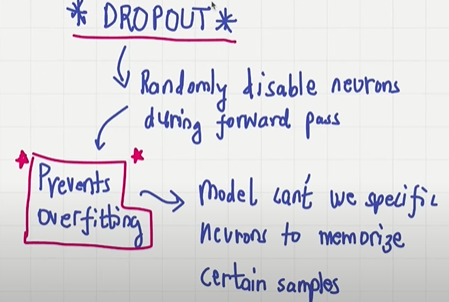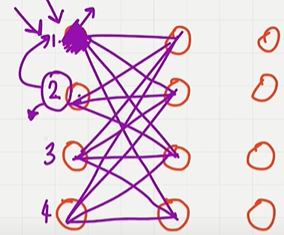

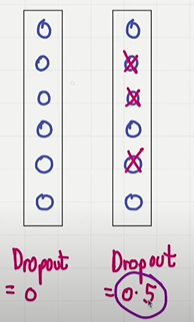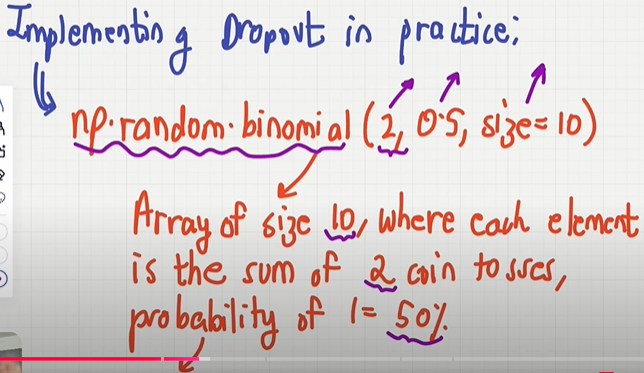

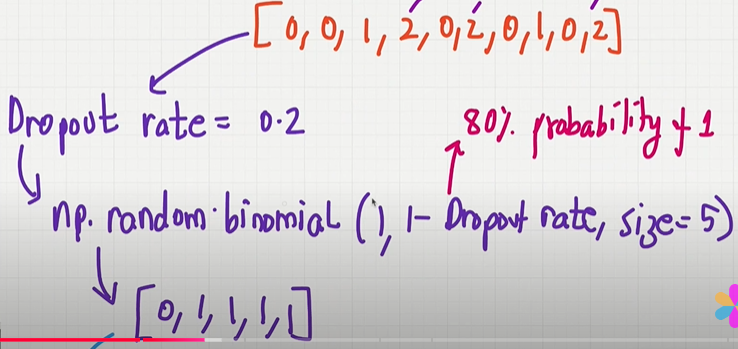

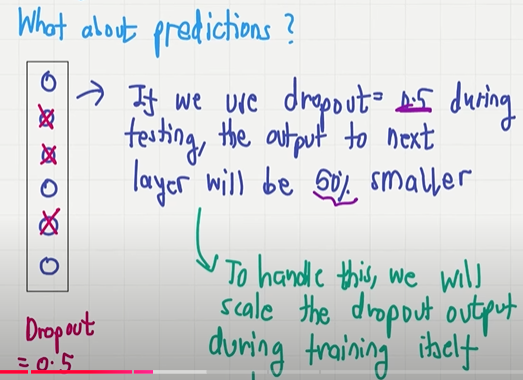

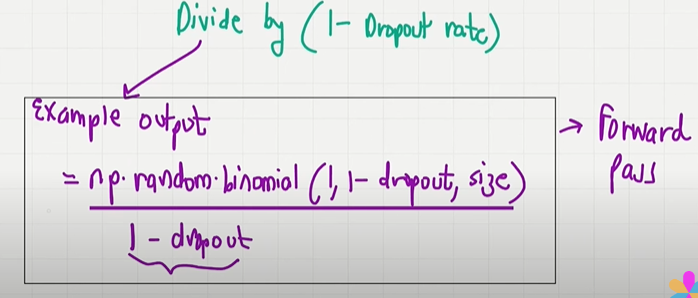

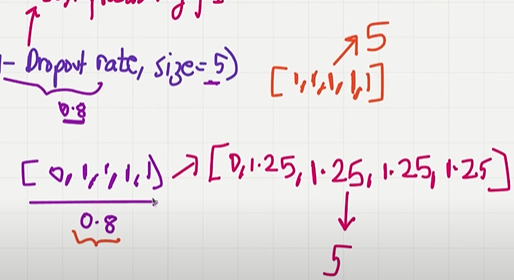

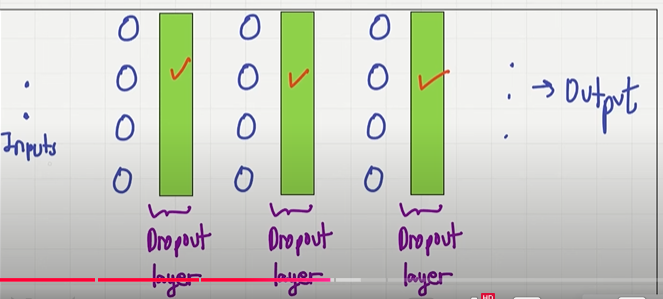

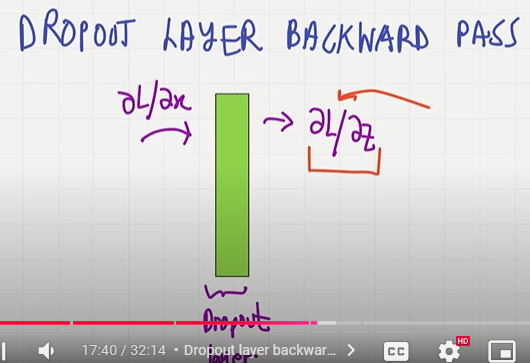

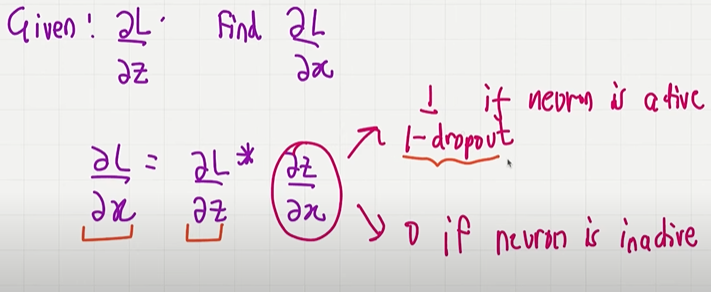

In [4]:
from nnfs.datasets import spiral_data
from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
# from SGD_optimizer import Optimizer_SGD
# from Softmax_Act import Activation_Softmax
# from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
# from ADAGRAD_optimizer import Optimizer_Adagrad
# from RMSProp_optimizer import Optimizer_RMSprop
from Adam_optimizer import Optimizer_Adam
# from Dropout_layer import Layer_Dropout

In [3]:
import numpy as np

class Layer_Dropout:
    #initializzze drop out
    def __init__(self, rate):
        # store the dropout rate, invert it to get the success rate
        # for example for a dropout rate of 0.1 we need a success rate of 0.9
        self.rate =1 -  rate

    def forward(self,inputs):
        #save input values
        self.inputs = inputs
        #generate and save the scaled binary mask
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        #apply mask to output values
        self.output = inputs * self.binary_mask

    # backward
    def backward(self, dvalues):
        #apply the mask to gradients
        self.dinputs = dvalues * self.binary_mask
        



In [5]:
# create dataset

X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 64 output values

dense1 = Layer_Dense(2, 64) #, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4

# Create ReLU activation (to be used with Dense layer)

activation1 = Activation_ReLU()

# Create Dropout layer with 20% dropout

dropout1 = Layer_Dropout(0.1)

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)

dense2 = Layer_Dense(64, 3) # weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.05, decay=5e-7)

# Train in loop

for epoch in range(100): # 1000

    # Perform a forward pass of our training data through this layer

    dense1.forward(X)
    
    # Perform a forward pass through activation
    
    activation1.forward(dense1.output)

    # perform a forward pass through dropout layer
    
    dropout1.forward(activation1.output)
    
    # Perform a forward pass through second Dense layer
    
    # takes outputs of activation function of first layer as inputs
    
    dense2.forward(dropout1.output)
    
    # Perform a forward pass through activation function of second layer
    
    data_loss = loss_activation.forward(dense2.output, y)
    
   # calculate regularization prenalty
    regularization_loss = loss_activation.regularization_loss(dense1) +  loss_activation.regularization_loss(dense2)
    
    # calculate total loss
    total_loss = data_loss + regularization_loss 
    
    # calcualte accuracy from output of activation2 and targets, calculate values along
    # first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == y)

    if not epoch % 10:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {total_loss:.3f}, ' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)
    
    # validate the model
    # create test dataset
    X_test, y_test = spiral_data(samples=100, classes=3)

    # Perform a forward pass of our testing data through this layer
    dense1.forward(X_test)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y_test)

    # calculate accuracy from output of activation2 and targets, calculate values along
    # first axis
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_test.shape) == 2:
        y_test = np.argmax(y_test, axis=1)
    accuracy = np.mean(predictions == y_test)

    print(f'validation, ' +
          f'acc: {accuracy:.3f}, ' +
          f'loss: {loss:.3f}')

epoch: 0, acc: 0.343, loss: 1.099, data_loss: 1.099, reg_loss: 0.000, lr: 0.05
validation, acc: 0.370, loss: 1.099
validation, acc: 0.357, loss: 1.099
validation, acc: 0.387, loss: 1.099
validation, acc: 0.360, loss: 1.099
validation, acc: 0.367, loss: 1.099
validation, acc: 0.360, loss: 1.099
validation, acc: 0.377, loss: 1.099
validation, acc: 0.390, loss: 1.099
validation, acc: 0.350, loss: 1.099
validation, acc: 0.357, loss: 1.099
epoch: 10, acc: 0.360, loss: 1.099, data_loss: 1.099, reg_loss: 0.000, lr: 0.05
validation, acc: 0.370, loss: 1.099
validation, acc: 0.357, loss: 1.099
validation, acc: 0.367, loss: 1.099
validation, acc: 0.370, loss: 1.099
validation, acc: 0.350, loss: 1.099
validation, acc: 0.360, loss: 1.099
validation, acc: 0.383, loss: 1.099
validation, acc: 0.347, loss: 1.099
validation, acc: 0.357, loss: 1.099
validation, acc: 0.360, loss: 1.099
epoch: 20, acc: 0.353, loss: 1.099, data_loss: 1.099, reg_loss: 0.000, lr: 0.05
validation, acc: 0.363, loss: 1.099
valid